In [ ]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional, RepeatVector, TimeDistributed
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
% matplotlib inline
pd.set_option('display.max_colwidth',200)

In [ ]:
def read_text(filename):
  file=open(filename, mode='rt', encoding='utf-8')
  text=file.read()
  file.close()
  return text

In [ ]:
def to_lines(text):
  sents=text.strip().split('\n')
  sents=[i.split('\t') for i in sents]
  return sents

In [ ]:
data = read_text("/content/deu.txt")
deu_eng= to_lines(data)
deu_eng= array(deu_eng)

In [ ]:
deu_eng = deu_eng[:50000,:] 

In [ ]:
deu_eng 

array([['Go.', 'Geh.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi.', 'Hallo!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi.', 'Grüß Gott!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ['Tom is still sitting.', 'Tom sitzt noch.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2273521 (CK) & #10190706 (wolfgangth)'],
       ['Tom is still smoking.', 'Tom raucht immer noch.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2646953 (CK) & #8072723 (Luiaard)'],
       ['Tom is still talking.', 'Tom spricht noch.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2646952 (CK) & #10150806 (wolfgangth)']],
      dtype='<U537')

In [ ]:
eng_1 = []
deu_1 = []

for i in deu_eng[:,0]:
  eng_1.append(len(i.split()))

for i in deu_eng[:,1]:
  deu_1.append(len(i.split()))

In [ ]:
length_df = pd.DataFrame({'eng':eng_1, 'deu':deu_1})

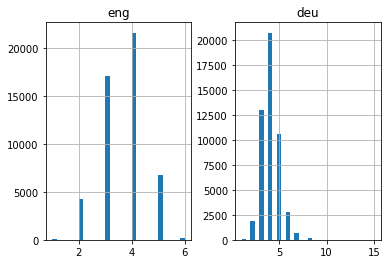

In [ ]:
length_df.hist(bins=30)
plt.show() 

In [ ]:
def tokenization(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [ ]:
eng_tokenizer = tokenization(deu_eng[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size) 

English Vocabulary Size: 6123


In [ ]:
deu_tokenizer = tokenization(deu_eng[:, 0])
deu_vocab_size = len(deu_tokenizer.word_index) + 1

deu_length = 8
print('Deutch Vocabulary Size: %d' % deu_vocab_size) 

Deutch Vocabulary Size: 6123


In [ ]:
def encode_sequences(tokenizer,length,lines):
  seq=tokenizer.texts_to_sequences(lines)
  seq=pad_sequences(seq, maxlen=length,padding='post')
  return seq  

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(deu_eng, test_size=0.2, random_state=12)

In [ ]:
trainX = encode_sequences(deu_tokenizer,deu_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer,eng_length, train[:, 0])

In [ ]:
testX = encode_sequences(deu_tokenizer,deu_length, test[:, 1])
testY = encode_sequences(eng_tokenizer,eng_length, test[:, 0])

In [ ]:
def build_model(in_vocab,out_vocab,in_timesteps,out_timesteps,units):
  model = Sequential()
  model.add(Embedding(in_vocab,units,input_length=in_timesteps,mask_zero=True))
  model.add(LSTM(units))
  model.add(RepeatVector(out_timesteps))
  model.add(LSTM(units,return_sequences=True))
  model.add(Dense(out_vocab, activation='softmax'))
  return model 

In [ ]:
model = build_model(deu_vocab_size,eng_vocab_size,deu_length,eng_length,512)
rms = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rms,loss='sparse_categorical_crossentropy')

In [ ]:
filename = 'model.h1.24_malayaj'
checkpoint = ModelCheckpoint(filename,monitor='val_loss',verbose=1,save_best_only=True,mode='min')
history = model.fit(trainX,trainY.reshape(trainY.shape[0],trainY.shape[1],1),
                         epochs=5,batch_size=512,validation_split=0.2,
                                   callbacks=[checkpoint],verbose=1)

Epoch 1/5
63/63 [==============================] - ETA: 0s - loss: 3.9221
Epoch 1: val_loss improved from inf to 3.22001, saving model to model.h1.24_malayaj


INFO:tensorflow:Assets written to: model.h1.24_malayaj/assets


INFO:tensorflow:Assets written to: model.h1.24_malayaj/assets


63/63 [==============================] - 244s 4s/step - loss: 3.9221 - val_loss: 3.2200
Epoch 2/5
63/63 [==============================] - ETA: 0s - loss: 3.0487
Epoch 2: val_loss improved from 3.22001 to 2.98500, saving model to model.h1.24_malayaj


INFO:tensorflow:Assets written to: model.h1.24_malayaj/assets


INFO:tensorflow:Assets written to: model.h1.24_malayaj/assets


63/63 [==============================] - 239s 4s/step - loss: 3.0487 - val_loss: 2.9850
Epoch 3/5
63/63 [==============================] - ETA: 0s - loss: 2.8787
Epoch 3: val_loss improved from 2.98500 to 2.88767, saving model to model.h1.24_malayaj


INFO:tensorflow:Assets written to: model.h1.24_malayaj/assets


INFO:tensorflow:Assets written to: model.h1.24_malayaj/assets


63/63 [==============================] - 236s 4s/step - loss: 2.8787 - val_loss: 2.8877
Epoch 4/5
63/63 [==============================] - ETA: 0s - loss: 2.7453
Epoch 4: val_loss improved from 2.88767 to 2.74465, saving model to model.h1.24_malayaj


INFO:tensorflow:Assets written to: model.h1.24_malayaj/assets


INFO:tensorflow:Assets written to: model.h1.24_malayaj/assets


63/63 [==============================] - 236s 4s/step - loss: 2.7453 - val_loss: 2.7446
Epoch 5/5
63/63 [==============================] - ETA: 0s - loss: 2.5994
Epoch 5: val_loss improved from 2.74465 to 2.63188, saving model to model.h1.24_malayaj


INFO:tensorflow:Assets written to: model.h1.24_malayaj/assets


INFO:tensorflow:Assets written to: model.h1.24_malayaj/assets


63/63 [==============================] - 235s 4s/step - loss: 2.5994 - val_loss: 2.6319


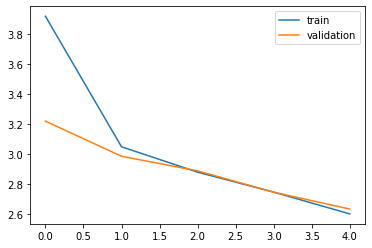

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [ ]:
model = load_model('model.h1.24_malayaj')
preds = model.predict(testX.reshape(testX.shape[0],testX.shape[1]))

In [ ]:
def get_word(n,tokenizer):
  for word,index in tokenizer.word_index.items():
    if index == n.all():
      return word
  return None 

In [ ]:
preds_text = []
for i in preds:
  temp = []
  for j in range(len(i)):
    t = get_word(i[j], eng_tokenizer)
    if j>0:
      if(t==get_word(i[j-1],eng_tokenizer)) or (t==None):
        temp.append('')
      else:
        temp.append(t)

    else:
      if(t==None):
        temp.append('')
      else:
        temp.append(t)

preds_text.append(''.join(temp))

In [ ]:
# pred_df = pd.DataFrame({'actual':test[:,0],'predicted':preds_text}) :- This line was showing error, as the array size was not matching #

In [ ]:
# if len(test[:,0]) != len(preds_text):
#  if (len(test[:,0]) > len(preds_text)):
      # preds_text += (len(test[:,0])-len(preds_text))
#  elif (len(test[:,0]) < len(preds_text)):
#       test[:,0] += (len(preds_text)-len(test[:,0]))

#df = pd.DataFrame({'actual':test[:,0],'predicted':preds_text}) ###### I used this line of code too, but after one predicted value all the value were showing integers.

In [ ]:
l1 = test[:,0] # So, finally i executed as pd.Series and then concatenated the two lists of test and preds_text
l2 = preds_text
s1 = pd.Series(l1, name='actual')
s2 = pd.Series(l2, name='predicted')
df = pd.concat([s1,s2], axis=1)

In [ ]:
pd.set_option('display.max_colwidth',200)

In [ ]:
df.head(15)

,actual,predicted
0,Tom was laughed at.,tom
1,Tom's fat.,NaN
2,Tom's limping.,NaN
3,Stay together.,NaN
4,You're under arrest.,NaN
5,The news shocked me.,NaN
6,I can't even do that.,NaN
7,Tom opened the book.,NaN
8,I didn't like it.,NaN
9,We need a steamboat.,NaN
